In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import timedelta
from sklearn.metrics import root_mean_squared_error
import pickle
from prepare_data import PrepareData
from pmdarima.arima import auto_arima


/home/jang/ske/da/project-sarimax/training/prepare_data.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample("6H")


Get Data

In [2]:
df = PrepareData.df
train_data = PrepareData.train_data()
test_data = PrepareData.test_data()

In [3]:
#TODO: change this if necessary
attr = "temperature"

# Training sarima to predict the temperature 

## EDA

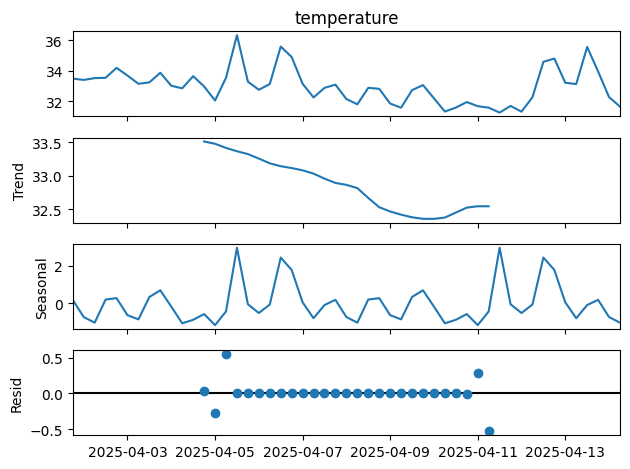

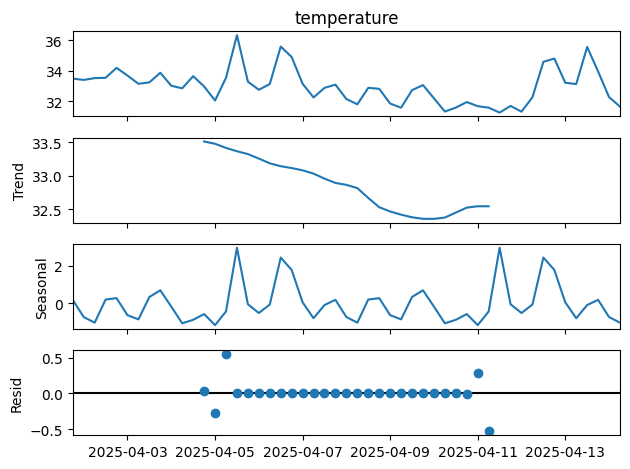

In [4]:
seasonal_decompose(df[attr].interpolate(), model="additive").plot()

In [5]:
diffed_data = df[attr].dropna()
diff = 0
while True:
    result = adfuller(diffed_data)
    if result[1] < 0.05 or result[0] < result[4]["5%"]:
        print(f"d={diff}")
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        for key, value in result[4].items():
            print('Critial Values:')
            print(f'   {key}, {value}')
        break
    diffed_data = diffed_data.diff().dropna()
    diff+=1

d=1
ADF Statistic: -3.5114707079305596
p-value: 0.0076973427983407176
Critial Values:
   1%, -3.584828853223594
Critial Values:
   5%, -2.9282991495198907
Critial Values:
   10%, -2.6023438271604937


Use d=1.

### Find the P parameter

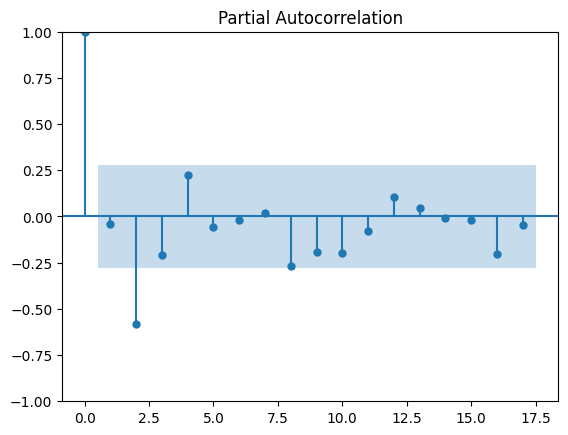

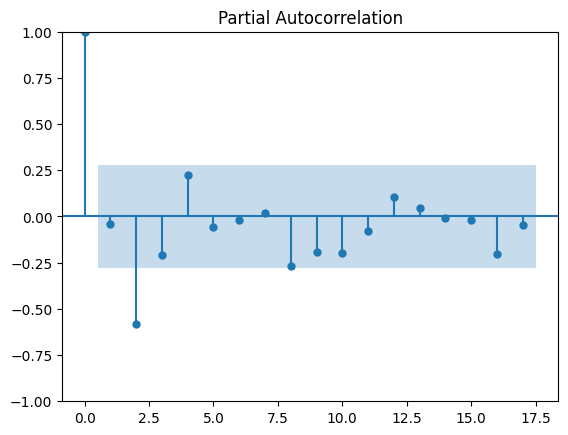

In [6]:
plot_pacf(diffed_data)

Fill this in, also check other files if this is correct.

### Find the Q parameter

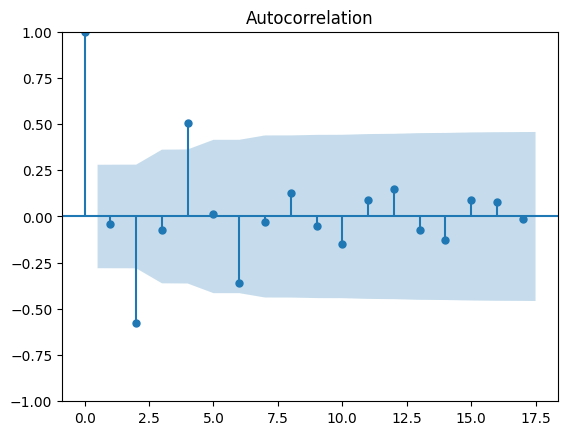

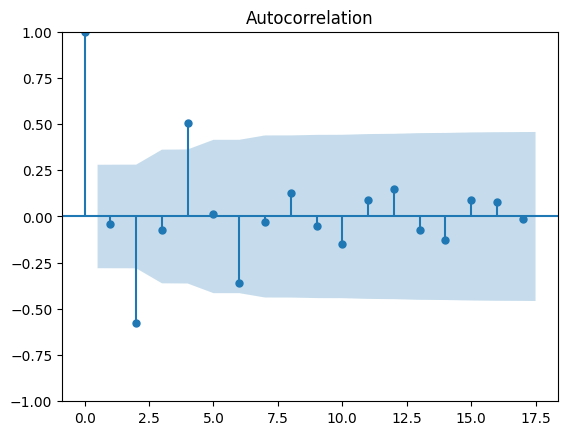

In [7]:
plot_acf(diffed_data)

Fill this in, also check other files if this is correct.

## Pre-Processing

Fill in missing value (lost due to server outage)
Use ffill, which replace NULL values with the value from the previous row.

In [ ]:
train_data[attr] = train_data[attr].ffill()
test_data[attr] = test_data[attr].ffill()

/tmp/ipykernel_111589/2514631960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[attr] = train_data[attr].ffill()
/tmp/ipykernel_111589/2514631960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[attr] = test_data[attr].ffill()


## Train the model

In [ ]:
# Use auto_arima to find the best model parameters
# idk wtf each parameters does, go fix yourself.
#TODO: change parameters
model = auto_arima(
    train_data[attr],
    seasonal=True,
    m=3,  # Seasonality settings
    d=1, # set to match d in EDA (I think)
    D=0,
    max_p=3,
    max_q=3,
    max_P=2,
    max_Q=2,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
)

/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=78.249, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=83.483, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=86.458, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=inf, Time=0.15 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[3]             : AIC=81.534, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=76.251, Time=0.18 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=inf, Time=0.22 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[3] intercept   : AIC=78.249, Time=0.21 sec
 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=76.679, Time=0.13 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[3] intercept   : AIC=80.249, Time=0.28 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[3] intercept   : AIC=inf, Time=0.38 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[3] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,1)(0,0,1)[3] intercept   : AIC=inf, Time=0.13 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[3]             : AIC=74.581, Time=0.14 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[3]             : AIC=inf, Time=0.25 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,1)[3]             : AIC=76.581, Time=0.24 sec
 ARIMA(2,1,2)(0,0,2)[3]             : AIC=76.581, Time=0.16 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[3]             : AIC=75.016, Time=0.12 sec
 ARIMA(2,1,2)(1,0,2)[3]             : AIC=78.579, Time=0.20 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[3]             : AIC=inf, Time=0.26 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[3]             : AIC=inf, Time=0.23 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[3]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(2,1,2)(0,0,1)[3]          
Total fit time: 4.430 seconds


In [10]:
model_attr = SARIMAX(
    endog=train_data[attr], order=(2, 1, 2), seasonal_order=(1, 0, 1, 3)
)
attr_results = model_attr.fit()

steps = len(test_data)

attr_prediction = attr_results.get_forecast(
    steps=steps
).predicted_mean
forecast_index = pd.date_range(
    start=test_data.index[0],
    freq=timedelta(days=1),
    periods=int(test_data[attr].count()),
)
attr_prediction.index = test_data.index[:steps]
attr_prediction.columns = ["predicted"]

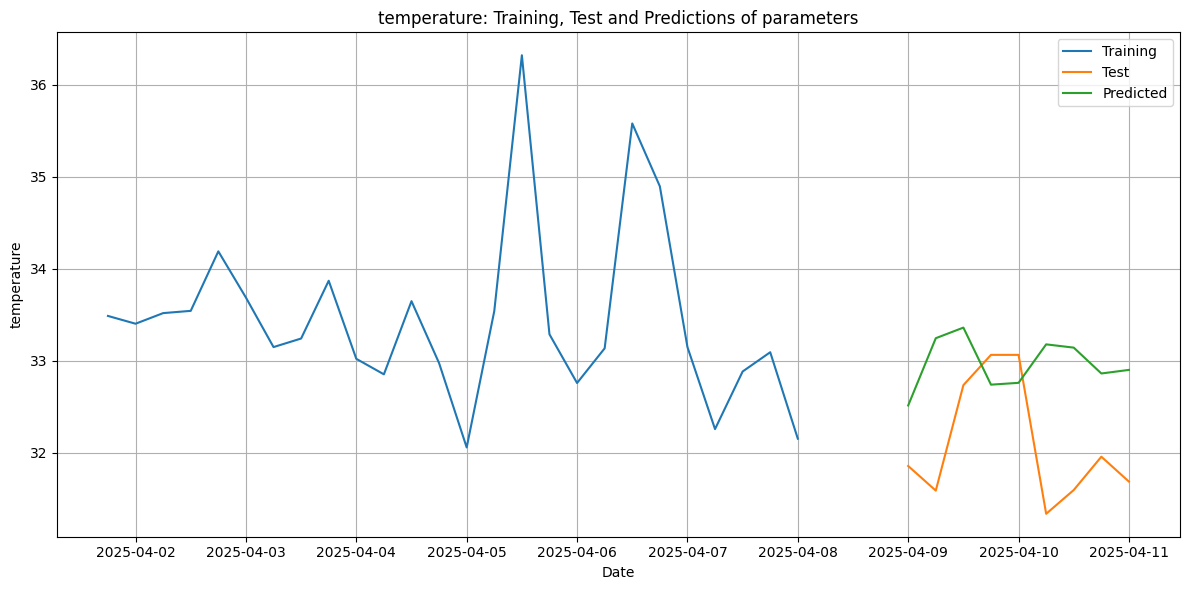

RMSE is :  1.1476716360802195


In [11]:
plt.figure(figsize=(12, 6))
# Ensure datetime index and proper plotting
plt.plot(train_data.index, train_data[attr], label="Training")
plt.plot(test_data.index, test_data[attr], label="Test")
plt.plot(test_data.index, attr_prediction, label="Predicted")

plt.legend()
plt.xlabel("Date")
plt.ylabel(attr)
plt.title(f"{attr}: Training, Test and Predictions of parameters")
plt.grid(True)
plt.tight_layout()
plt.show()

print("RMSE is : ", root_mean_squared_error(test_data[attr], attr_prediction))

## Save the model using pickle

In [ ]:
#TODO: change file name
with open(f"../exports/{attr}_sarima.pkl", "wb") as file:
    pickle.dump(attr_results, file)